<a href="https://colab.research.google.com/github/ElkkuElias/Colorization/blob/main/colourisation__model_vegs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mustavalkokuvien väritys
### Ryhmä: Elena Blinova, Jonne Karhunen, Kristiina Saarinen, Elias Vuorinen

## 1. Johdanto

Tässä projektissa tavoitteena oli luoda ja kouluttaa neuroverkko, joka kykenee värittämään mustavalkoisia valokuvia todenmukaisesti. Projekti kävi läpi useita eri vaiheita ja kokeiluja parhaan koulutusmallin ja datasetin löytämiseksi.

Projektin toteuttamisessa noudatettiin CRISP-DM-prosessimallia. Prosessin aikana painotettiin erityisesti datan valmistelua, mallin rakentamista ja tulosten arviointia onnistuneen lopputuloksen saavuttamiseksi. Seuraavissa osioissa käsitellään tarkemmin kunkin osa-alueen toteutusta ja saavutettuja tuloksia.

## 2. Historia

Aluksi valittiin projektiamme varten maisema-datasetti. Datasetti on jaettu viiteen luokkaan: metsät, jäätiköt, rannikot, aavikot ja vuoret. Kuvien värittämiseksi tarvittiin sekä värillisiä kuvia että niiden harmaasävyisiä vastineita. Tämä herätti kysymyksen siitä, miten värilliset kuvat muunnetaan harmaasävyisiksi menettämättä tietoja väreistä. Tähän tehtävään harkittiin useita väriavaruuksia, kuten RGB, HSV/HSL ja Lab. Seuraavassa on lyhyt katsaus niiden eroihin:

- **RGB**: Värimalli, jossa värit luodaan yhdistämällä punaista, vihreää ja sinistä eri voimakkuudella. Kukin kanava vaihtelee tyypillisesti välillä 0-255 (tai 0-1 normalisoituna).
- **HSV/HSL**: Nämä mallit esittävät värit värisävyn (**H**), saturaation (**S**) ja kirkkauden (**V**) tai vaaleuden (**L**) perusteella. Värisävy määrittelee värin tyypin (esim. punainen, vihreä, sininen), saturaatio mittaa intensiteettiä ja kirkkaus/valoisuus mittaa valovoimakkuutta. Vaikka nämä mallit ovat ihmisille intuitiivisia, ne eivät ole havaintomielessä yhdenmukaisia, minkä vuoksi ne eivät sovellu kovin hyvin tehtäviin, jotka edellyttävät tarkkaa värien käsittelyä.
- **Lab**: Väriavaruus, jossa on kolme komponenttia: **L** (vaaleus), **a** (vihreästä punaiseen) ja **b** (sinisestä keltaiseen). Lab on havaintomielessä yhtenäinen, eli arvojen muutokset vastaavat ihmissilmän havaitsemia muutoksia.

Kun on kyse värien ennustamisesta neuroverkon avulla:

- **RGB**: Verkon on ennustettava kolme toisistaan riippuvaista arvoa (R, G ja B) pikseliä kohti, jolloin yhdistyvät sekä kirkkaus että väri.
- **Lab**: Verkko ennustaa vain kaksi arvoa (a ja b) värille, kun taas kirkkaus (L) on jo annettu, mikä yksinkertaistaa tehtävää.
- **HSL/HSV**: Verkon on ennustettava värisävy (H), saturaatio (S) ja vaaleus/kirkkaus (L/V). Koska värisävy ja saturaatio ovat epälineaarisia, virheet voivat johtaa näkyviin artefakteihin tai luonnottomiin väreihin.

Nämä tekijät huomioon ottaen valittiin **Lab**-väriavaruuden projektimme väriavaruudeksi.

### Ensimmäinen yritys
- **Datasetti**: Maisemat
- **Malli**: CNN (Convolutional Neural Network), jossa on enkooderi-dekooderi -rakenne. Kukin komponentti koostui kolmesta konvoluutiokerroksesta, joissa oli ReLU-aktivointifunktiot.
- **Häviöfunktio**: Keskimääräinen neliövirhe (MSE)

<img src="https://drive.google.com/uc?id=1sL7czBt4wS9DrETEpaMirZ4-HrKjIIPh" alt="Mallin kuva" width="400">

Lähtökuvat olivat aluksi erittäin pieniä (noin 32x32 pikseliä). Koko-ongelmasta huolimatta nähtiin ensimmäiset tuloksemme - kuviin levitettiin jonkin verran värejä.

<img src="https://drive.google.com/uc?id=1tft8UzuqwaSzSIrJnp7A_amNhhhLbQLI" alt="cnn small result">

Kun kokoongelma oli ratkaistu, tulokset paranivat, mutta olivat edelleen kaukana ihanteellisesta:

  - Malli ei pystynyt erottamaan hiekkaa vedestä tai taivaasta.
  - Vihreän sävyt olivat liian ruskeat.

<img src="https://drive.google.com/uc?id=1riZlPMKunLof0KUQBVr_g3p0wTnHwvb-" alt="cnn normal result">

Lisäksi tietokokonaisuuden luokkapohjainen rakenne aiheutti haasteita. Yhden luokan (esim. rannikot) harjoittelu johti huonoon yleistettävyyteen muihin luokkiin, kuten jäätiköihin tai metsiin. Jopa luokkia yhdistettäessä mallilla oli vaikeuksia erottaa toisistaan elementtejä, kuten jäätä ja kasvillisuutta tai hiekkaa ja aaltoja.

<img src="https://drive.google.com/uc?id=1CLfYSn6NWsJWivM7vUd0187mmt0ie2cp" alt="cnn wrong classes">

### Esikoulutettujen mallien tutkiminen

- **Datasetti**: Maisemat
- **Malli**: esikoulutettu VGG16.
- **Häviöfunktio**: Keskimääräinen neliövirhe (MSE)

Kokeiltiin käyttää valmiiksi koulutettua mallia **VGG16**. Tulokset olivat hieman parempia:

- Taivas oli eri sävyinen, ja hiekka tunnistettiin oikein.
- Värit pysyivät kuitenkin himmeinä, vihreät olivat edelleen ruskehtavia, ja monet kuvat oli väritetty väärin.

<img src="https://drive.google.com/uc?id=1y59TvLmh3kg5l7FerYRqITVTY3OZ0Tpa" alt="vgg16 result">

### U-net -arkkitehtuurin käyttöönotto

Uusia lähestymistapoja etsiessämme tutkittiin malli, jossa yhdistetään **U-Net**- ja **GAN**-arkkitehtuurit (Generative Adversarial Networks).

- **U-Net** on kuvan segmentointiin suunniteltu konvoluutioverkko. (Kuvaamme sitä yksityiskohtaisesti mallintamista koskevassa osassa).
- **GAN**:ia käytetään generatiivisiin tehtäviin, mutta sitä ei integroitu lopulliseen malliimme, koska haluttiin pitää arkkitehtuurin yksinkertaisena ja sellaisena, että ymmärsimme itse implementaation toiminnan.

Tulokset **U-netin** kanssa olivat poikkeuksellisia! Tämä sai meidät ottamaan U-Netin lopullisen mallimme perustaksi.

<img src="https://drive.google.com/uc?id=1STHWxwn-kqb0w3ZEXuPvcaYmr9gk3tuI" alt="unet+gan result">

### Lopullinen malli

- **Datasetti**: Maisemat
- **Malli**: U-Net
- **Häviöfunktio**: L1 Loss

**U-Netin** avulla tulokset paranivat merkittävästi jo 50 epookin jälkeen. Suorituskyky kuitenkin vaihteli kuvien mukaan:

- Jotkin kuvat olivat lähes identtisiä alkuperäisten kanssa.


<img src="https://drive.google.com/uc?id=1AobdxQdX8FHH3ckQ9ckUoHtouE4o0QIK" alt="unet landscape">


- Toiset taas olivat suhteellisen epätarkkoja.


<img src="https://drive.google.com/uc?id=1J_TKBvPch0n_cx-xXHulIMylRIDzwqNh" alt="unet landscape wrong">

<img src="https://drive.google.com/uc?id=1CNWJ0YDf5zoURpk0bBP2xspCxUCW94tx" alt="unet landscape wrong1">

Koska emme pystyneet tuottamaan mallilla yleisesti ottaen tyydyttäviä tuloksia, päätimme vaihtaa yksinkertaisempaan datasettiin.

### Lopullinen datasetti

- **Datasetti**: Vihannekset
- **Malli**: U-net
- **Häviöfunktio**: L1 Loss

Kokeiltuamme useita datasettiä päädyttiin **Vihannekset**-datasettiin. Tämä datasetti tuotti paljon johdonmukaisempia ja laadukkaampia tuloksia.

<img src="https://drive.google.com/uc?id=142wQAL0mdy16SFe9k-qiLCkY-ccGrkLD" alt="unet vegetables">

Valitusta datasetistä ja sen erityispiirteistä kerrotaan tarkemmin asiakirjojen seuraavassa osassa, kun taas mallin arkkitehtuuri ja toteutus kuvataan kohdassa ”Mallinnus”.

## 3. Datan ymmärtäminen

Kuten edellisessä osiossa kerrottiin, lopulliseen malliin päädyttiin käyttämään **Vihannekset**-datasettiä. Datasetissä on yhteensä 21 000 valokuvaa 15 eri kasviksesta. Datasetin sisältämät kasvisluokat ovat
-	papu
-	karela
-	pullokurpitsa
-	munakoiso
-	parsakaali
-	kaali
-	paprika
-	porkkana
-	kukkakaali
-	kurkku
-	papaija
-	peruna
-	kurpitsa
-	retiisi
-	tomaatti


Kukin luokka sisältää 1400 kuvaa, joiden koko on 224×224 ja tiedostomuoto on *.jpg. Datasetistä 70 % on jaettu koulutukseen, 15 % validointiin ja 15 % testaukseen.

Toisin sanoen, datasetti sisältää kolme kansiota:
- train (15000 kuvaa)
-	test (3000 kuvaa)
-	 validation (3000 kuvaa)


## 4. Datan valmistelu

Seuraavaksi tehdään datan valmistelu. Tavoitteena on järjestää ja yhtenäistää datakansiorakenne eri vaiheille (train, validation, test) siten, että kuvatiedostot ovat helposti käytettävissä. Prosessissa:

- Käydään läpi alkuperäisen datan kansiot
- Jokainen kuvatiedosto nimetään uudelleen sisältämään alikansion nimi (esim. vihannestyypin mukaan), jotta tiedoston alkuperä voidaan tunnistaa ilman alikansiota.
- Tiedostot kopioidaan uuteen hakemistorakenteeseen, joka luodaan erikseen jokaiselle vaiheelle (train, validation, test).

Tämä prosessi varmistaa, että kaikki datan kuvat ovat selkeästi ja yhtenäisesti järjestettyjä jatkokäsittelyä varten.

In [ ]:
import os
import shutil
from pathlib import Path

def consolidate_dataset(base_dir, output_base_dir):
    # Process each split
    splits = ['train', 'validation', 'test']

    for split in splits:
        input_dir = os.path.join(base_dir, split)
        output_dir = os.path.join(output_base_dir, split)
        print(f"Processing {split} split...")

        # Create output directory
        os.makedirs(output_dir, exist_ok=True)

        # Process all subdirectories (vegetable types)
        for subdir, _, files in os.walk(input_dir):
            for file in files:
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    # Get paths
                    src_path = os.path.join(subdir, file)
                    veg_type = os.path.basename(subdir)
                    new_filename = f"{veg_type}_{file}"
                    dst_path = os.path.join(output_dir, new_filename)

                    # Copy file
                    shutil.copy2(src_path, dst_path)

        print(f"Completed {split} split")

# Usage
base_dir = "Vegetable Images"
output_dir = "consolidated_vegs"
consolidate_dataset(base_dir, output_dir)

Processing train split...
Completed train split
Processing validation split...
Completed validation split
Processing test split...
Completed test split



Seuraavaksi luodaan järjestelmä kuvien lataamiseen ja esikäsittelyyn Lab-väriavaruudessa tehtävää väritystä varten. Kuvat muunnetaan RGB-muodosta Lab-muotoon, ja ne jaetaan kirkkaus- (L) ja väri-informaatiokanaviin (ab). Dataset-luokka vastaa kuvien käsittelystä, ja dataloaderit jakavat ne tehokkaasti batch-muotoon eri osia (train, validation, test) varten. Tämä valmistelu mahdollistaa datan käytön väritysmallin koulutuksessa.

In [ ]:
from torch.utils.data import Dataset, DataLoader
from skimage.color import rgb2lab
from skimage import io
from PIL import Image
import torchvision.transforms as transforms
import os
import numpy as np

# Custom Dataset for Lab colorization
class LabColorizationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith(('png', 'jpg', 'jpeg'))]
        self.transform = transform

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])

        # Load and convert to RGBA first, then to RGB
        img = Image.open(img_path)
        if img.mode == 'P':  # Palettized image
            img = img.convert('RGBA')
        img = img.convert('RGB')  # Now safely convert to RGB

        # Resize and continue processing
        img = img.resize((256, 256))
        rgb_array = np.array(img) / 255.0

        # Convert RGB to Lab
        lab_image = rgb2lab(rgb_array).astype("float32")

        # Split channels
        L_channel = lab_image[:, :, 0:1] / 50.0 - 1.0
        ab_channels = lab_image[:, :, 1:] / 128.0

        # Convert to tensors
        L_tensor = torch.from_numpy(L_channel.transpose((2, 0, 1))).float()
        ab_tensor = torch.from_numpy(ab_channels.transpose((2, 0, 1))).float()

        return L_tensor, ab_tensor

    def __len__(self):
        return len(self.image_files)

def get_dataloaders(train_dir, val_dir, test_dir, batch_size=32):
    # Create datasets from separate directories
    train_dataset = LabColorizationDataset(root_dir=train_dir)
    val_dataset = LabColorizationDataset(root_dir=val_dir)
    test_dataset = LabColorizationDataset(root_dir=test_dir)

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=1,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )

    return train_loader, val_loader, test_loader

## 5. Mallinnus

Käytetty malli perustuu UNet-arkkitehtuuriin, joka soveltuu erityisen hyvin käyttötarkoituksiin, joissa halutaan tehdä kuvanmuunnoksia (sisääntulo ja ulostulo ovat kummatkin kuvia). Se pystyy kartoittamaan sisään annetut pikselit yksi yhteen ulostuloon. Malli toimii oppimalla yhdistämällä tietyn pikselin luminanssin (harmaasävyarvo) sitä ympäröiviin visuaalisiin piirteisiin ja yrittää tämän perusteella ennustaa pikselin värin. Mallille annetaan sisääntulona LAB-väriavaruudeen muutetusta kuvasta L-kanava (edellä mainittu luminanssi) ja se koostuu kolmesta pääkomponentista: enkooderi, pullonkaula (bottleneck), ja dekooderi. Komponenttien tasojen määrittelyssä on jouduttu käyttämään sen kokoisia parametrejä, että koulutusaika pysyy kohtuullisena. Täten valitut parametrit eivät ole värityslopputuloksen näkökulmasta välttämättä optimaaleja.

Enkooderin tarkoituksena on löytää visuaalisia ominaisuuksia (rakenteita) sille annetuista mustavalkoisista kuvista. Käytetty enkooderi koostuu neljästä tasosta, joista jokainen sisältää kaksi erillistä konvoluutiotasoa, joilla kummallakin on oma ReLU-aktivaationsa. Konvoluutiotasojen tarkoituksena on löytää itse rakenteet ja tallentaa ne ominaisuuskarttoihin (feature maps). Jokaisen tuplakonvoluution jälkeen ominaisuuskartat syötetään yhdistävään tasoon (max pooling), joka pienentää niiden kokoa puolella. Tämän tarkoituksena on poistaa ylimääräistä tietoa, joka ei ole oleellista kun etsitään yleistettäviä piirteitä. Jokainen enkooderitaso tuottaa ominaisuuskarttoja, jotka sisältävät yhä monimutkaisempia rakenteita.

Toinen pääkomponentti on pullonkaula (bottleneck) toimii ns. siltana enkooderin ja dekooderin välillä. Se toimii pisteenä, jossa tiedon kompressointi (enkooderi) muuttuu tiedon uudelleenrakentamiseksi (dekooderi). Sen tarkoituksena on ottaa enkooderin tuottamat ominaisuuskartat ja löytää niistä kaikista korkeimman tason ominaisuudet, kuten esimerkiksi eri objektien sijainnit toisiinsa nähden. Tällä tavalla vain kuvien kontekstin kannalta oleelliset ominaisuudet tallennetaan.

Mallin viimeinen pääkomponentti on dekooderi. Dekooderin tarkoituksena on uudelleenrakentaa kuva pullonkaulalta saaduilla globaaleilla ominaisuuksilla ja enkooderilta saaduilla yksityiskohtaisemmilla ominaisuuksilla. Jokainen dekooderi tuplaa sille annetun datan dimension ja palauttaa enkoodausprosessissa menetetyn resoluution käyttäen bilineaarista skaalausta. Prosessissa käytetään skip-yhteyksiä, joissa on enkooderien tuottamat ominaisuudet yhdistetään dekooderin ominaisuuksiin. Tällä tavalla mallin ennustamat värit saadaan piirrettyä kuvan näkökulmasta oikeaan paikkaan ja tarkasti.

Lopuksi mallissa on ulostulotaso, joka käyttää 1x1 konvoluutiota (käytännössä yksi pikseli, sallii erikokoisten kuvien käytön) ja ennustaa 2-kanavaisen matriisin, joka vastaa LAB-väriavaruuden a ja b kanavia. Tason aktivaatiofunktiona toimii tanh, joka skaalaa arvot -1 ja 1 välille. Tämä toimii LAB-väriavaruuden kanssa hyvin, koska se käyttää krominanssiarvoja jotka ovat samalla skaalalla.

Ulostulon lopullinen muoto on (otoksen koko, 2, korkeus, leveys). Tämä yhdistetään sisääntulona annettuun L-kanavaan jonka avulla saadaan väritetty kuva.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNetColorization(nn.Module):
    def __init__(self):
        super(UNetColorization, self).__init__()

        # Encoder
        self.enc1 = self.double_conv(1, 64)
        self.enc2 = self.double_conv(64, 128)
        self.enc3 = self.double_conv(128, 256)
        self.enc4 = self.double_conv(256, 512)

        # Bottleneck
        self.bottleneck = self.double_conv(512, 512)

        # Decoder
        self.dec4 = self.up_conv(1024, 256)
        self.dec3 = self.up_conv(512, 128)
        self.dec2 = self.up_conv(256, 64)
        self.dec1 = self.up_conv(128, 64)

        self.final = nn.Conv2d(64, 2, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.max_pool(e1))
        e3 = self.enc3(self.max_pool(e2))
        e4 = self.enc4(self.max_pool(e3))

        # Bottleneck
        b = self.bottleneck(self.max_pool(e4))

        # Decoder
        d4 = self.dec4(torch.cat((self.crop_tensor(e4, b), b), dim=1))
        d3 = self.dec3(torch.cat((self.crop_tensor(e3, d4), d4), dim=1))
        d2 = self.dec2(torch.cat((self.crop_tensor(e2, d3), d3), dim=1))
        d1 = self.dec1(torch.cat((self.crop_tensor(e1, d2), d2), dim=1))

        out = self.final(d1)
        return torch.tanh(out)

    @staticmethod
    def double_conv(in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    @staticmethod
    def up_conv(in_channels, out_channels):
        return nn.Sequential(
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

    @staticmethod
    def max_pool(x):
        return F.max_pool2d(x, kernel_size=2, stride=2)

    @staticmethod
    def crop_tensor(encoder_tensor, decoder_tensor):
        _, _, h, w = decoder_tensor.size()
        return encoder_tensor[:, :, :h, :w]

Tässä osiossa määritetään koulutusputki mallille.

Tappiofunktioksi mallin koulutukseen valitaan L1-tappio (keski-itseisvirhe). L1 soveltuu hyvin tappiofunktioksi kuvien värityksen kaltaiseen tehtävään sen takia, että se laskee tappion lineaarisesti. Tämä on etu, koska pienet värierot yksittäisissä pikseleissä eivät ole koko kuvan värityksen näkökulmasta oleellisia eivätkä väridatan poikkeukset (joita kuvista löytyy luonnollisesti) dominoi optimisointiprosessia. Optimoijaksi valitaan ADAM, syynä sen tarjoama adaptiivinen oppimisaste joka soveltuu hyvin monimutkaisempiin tehtäviin kuten kuvien väritys. Se ei myöskään tarvitse yhtä paljon manuaalista hyperparametrien säätelyä kuin monet muut vaihtoehdot, joka helpottaa koulutuksen pitkän keston takia.

Itse koulutusprosessi on suhteellisen perinteinen. Koulutus kestää halutun määrän epookkeja ja jokaisen epookin jälkeen mallin suorituskykyä tarkastellaan validaatiosettiä vasten tappiofunktion avulla. Koulutusprosessin aikana paras malli (eli se joka tuottaa pienimmän tappioarvon validaatiodatalla) tallennetaan paikallisesti. Sen lisäksi myös viimeisen epookin jälkeinen malli tallennetaan (erikseen).

On myös hyvä huomioida, että väritystehtävissä perinteiset tarkkuusmittarit eivät ole suoraan sovellettavissa, koska kyseessä on jatkuva ennustusongelma.

Tässä tapauksessa malli koulutetaan 100 epookilla. Validaatiodatan tappioarvojen perusteella optimaalinen epookkimäärä olisi n. 50-60, pitkän koulutusajan takia mallia ei kuitenkaan tässä kohtaa kouluteta uudestaan.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision.utils import save_image
import os
from skimage.color import lab2rgb
import numpy as np

# Model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetColorization().to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

def train_lab(model, train_loader, val_loader, epochs=20, save_dir="./output"):
    os.makedirs(save_dir, exist_ok=True)
    best_val_loss = float('inf')

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for L, ab in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training"):
            L, ab = L.to(device), ab.to(device)

            optimizer.zero_grad()
            output = model(L)
            loss = criterion(output, ab)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for L, ab in tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} - Validation"):
                L, ab = L.to(device), ab.to(device)
                output = model(L)
                loss = criterion(output, ab)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Training Loss: {avg_train_loss:.4f}")
        print(f"Validation Loss: {avg_val_loss:.4f}")

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss,
            }, os.path.join(save_dir, 'best_model_valid.pth'))
            print(f"Saved new best model with validation loss: {avg_val_loss:.4f}")

# Hyperparameters
batch_size = 32
epochs = 100

# Load data
train_dir = "consolidated_vegs/train"
val_dir = "consolidated_vegs/validation"
test_dir = "consolidated_vegs/test"

train_loader, val_loader, test_loader = get_dataloaders(
    train_dir=train_dir,
    val_dir=val_dir,
    test_dir=test_dir,
    batch_size=batch_size
)

# Train model
train_lab(model, train_loader, val_loader, epochs=epochs, save_dir="./output")

# Save final model
torch.save(model.state_dict(), "./output/unet_colorization_veg_valid.pth")
print("Training completed. Model saved.")

## 6. Arviointi
Tässä osuudessa keskitytään mallin arkkitehtuurin sekä ulostulon vertailua toiseen tunnettuun väritysneuroverkkoon.

### 6.1 Vertailu toiseen neuroverkkoarkkitehtuuriin

Tarkastellaan toista lähestymistapaa ja arkkkitehtuuria väritysongelman ratkaisemiseen.

Katsotaan Zhang et al:n "Colourful Image Colorization" -mallia joka on treenattu käyttäen ImageNet datasettiä.

Mallin koodi on saataavilla [tästä](https://github.com/richzhang/colorization/tree/master).

Ja siitä on lisää luettavaa [täältä](https://richzhang.github.io/colorization/)


Värien normalistointi

```python
import torch
from torch import nn

class BaseColor(nn.Module):
    def __init__(self):
        super(BaseColor, self).__init__()
        self.l_cent = 50.
        self.l_norm = 100.
        self.ab_norm = 110.

    def normalize_l(self, in_l):
        return (in_l-self.l_cent)/self.l_norm

    def unnormalize_l(self, in_l):
        return in_l*self.l_norm + self.l_cent

    def normalize_ab(self, in_ab):
        return in_ab/self.ab_norm

    def unnormalize_ab(self, in_ab):
        return in_ab*self.ab_norm
```



Mallin arkkitehtuuri

```python
import torch
import torch.nn as nn
import numpy as np
from IPython import embed

from .base_color import *

class ECCVGenerator(BaseColor):
    def __init__(self, norm_layer=nn.BatchNorm2d):
        super(ECCVGenerator, self).__init__()

        #Ensimmäiset kerrokset jotka ottavat sisään harmaansävynkuvan ja muuntaa sen 64 piirrekanavaksi, Stride=2 jolloin filtteri(kerneli) liikkuu kaksi yksikköä inputin yli. Relu lisää epälinearisuutta ja normalisointi auttaa pitämään arvot järkevinä.

        model1=[nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[norm_layer(64),]

        #Kaksinkertaistetaan piirrekanavien määrä 64:stä 128:aan. Jälleen stride=2 jotta verkko näkee laajempia rakenteita.

        model2=[nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[norm_layer(128),]

        #Piirrekanavien määrä kasvaa 256:een. Kolme convoluutiokerrosta mahdollistaa piirteiden oppimisen.

        model3=[nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[norm_layer(256),]

        #"Toinen osa" Piirrekanavien määrä kasvaa 512:een. Stride nyt 1 eli kuva ei pienene vaan keskitytään piirteiden oppimiseen.

        model4=[nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[norm_layer(512),]

        #Seuraavat kaksi kerrosta ovat samanlaisia. Convoluutio kerroksia joissa dilation = 2 eli 3x3 kerneli tarkastelee 5x5 aluetta niin että jokaisen pikselin välissä on tyhjä aukko.

        model5=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[norm_layer(512),]

        model6=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[norm_layer(512),]

        # Viimeinen osa alkaa jossa piirteitä opitaan

        model7=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[norm_layer(512),]

        #Värien tuottaminen

        #Ensin kasvatetaan kuvan kokoa transponoivalla konvoluutiolla, ja lopulta tuotetaan 313 väriluokkaa jokaiselle pikselille. Viimeinen 1x1 konvoluutio toimii kuin luokittelija, joka päättää todennäköisimmät värit kullekin pikselille.

        #Lopuksi softmax-funktio muuntaa nämä 313 arvoa todennäköisyyksiksi, ja model_out-kerros muuntaa ne takaisin ab-väriarvoiksi. Upsample4 kasvattaa kuvan takaisin alkuperäiseen kokoon.

        model8=[nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]

        model8+=[nn.Conv2d(256, 313, kernel_size=1, stride=1, padding=0, bias=True),]

        self.model1 = nn.Sequential(*model1)
        self.model2 = nn.Sequential(*model2)
        self.model3 = nn.Sequential(*model3)
        self.model4 = nn.Sequential(*model4)
        self.model5 = nn.Sequential(*model5)
        self.model6 = nn.Sequential(*model6)
        self.model7 = nn.Sequential(*model7)
        self.model8 = nn.Sequential(*model8)

        self.softmax = nn.Softmax(dim=1)
        self.model_out = nn.Conv2d(313, 2, kernel_size=1, padding=0, dilation=1, stride=1, bias=False)
        self.upsample4 = nn.Upsample(scale_factor=4, mode='bilinear')

    def forward(self, input_l):
        conv1_2 = self.model1(self.normalize_l(input_l))
        conv2_2 = self.model2(conv1_2)
        conv3_3 = self.model3(conv2_2)
        conv4_3 = self.model4(conv3_3)
        conv5_3 = self.model5(conv4_3)
        conv6_3 = self.model6(conv5_3)
        conv7_3 = self.model7(conv6_3)
        conv8_3 = self.model8(conv7_3)
        out_reg = self.model_out(self.softmax(conv8_3))

        return self.unnormalize_ab(self.upsample4(out_reg))

def eccv16(pretrained=True):
	model = ECCVGenerator()
	if(pretrained):
		import torch.utils.model_zoo as model_zoo
		model.load_state_dict(model_zoo.load_url('https://colorizers.s3.us-east-2.amazonaws.com/colorization_release_v2-9b330a0b.pth',map_location='cpu',check_hash=True))
	return model
```



Zhang et al.:n Colorful Image Colorization -malli hyödyntää syvää konvoluutioverkkoa, jonka arkkitehtuuri on suunniteltu väritysongelman ratkaisemiseen luokittelupohjaisella lähestymistavalla, jossa väritys nähdään luokitteluongelmana jokaisen pikselin kohdalla.

Mallin rakenne etenee lineaarisesti eteenpäin ilman skip-yhteyksiä tai enkooderi-dekooredi -rakennetta ja se koostuu kolmesta pääosasta.
Ensimmäinen osa käsittelee matalan tason piirteitä. Toinen osa yhdistää ensimmäisen tason piirteitä kuvioiksi ja kolmas osa huomioi laajemman kontekstin joissa toisen kerroksen kuviot esiintyvät.

Arkkitehtuurin ulostulokerros, luokittelukerros tuottaa 313- kanavaisen ulostulon jokaista pikseliä varten, jossa jokainen kanava vastaa yhtä väriarvoa. Mallissa käytetään 313 värikanavaa, koska se perustuu Lab-väriavaruuden a- ja b-kanavien diskretisointiin tasavälein.
Tämä määrä värikanavia on havaittu optimaaliseksi kompromissiksi: se tarjoaa riittävän tarkan väriresoluution luonnollisen näköisille kuville, mutta pitää mallin laskentatehon järkevänä.

Softmax-aktivaatio muuntaa nämä todennäköisyysjakaumaksi, joista todennäköisimmät värit valitaan väritykseen.

Esimerkkinä tilanne joissa mallille syötetään kuva paprikasta:
Malli on koulutuksen aikana tunnistanut muotoja ja tekstuureja, jotka muistuttavat paprikaa ja että ne yleensä esiintyvät tietyillä väreillä.
Malli käsittelee paprikan kuvan ja antaa todennäköisyyksiä näille paprikan tyypillisille väreille huomoiden silti ympäröivien pikseleiden kontekstin. Esim yksi tumma väritön paprikan pikseli voisi olla: 60% punainen, 20% oranssi, 20% vihreä ja 0% sininen.
Näistä malli valitsee todennäiköisimmän värin (punainen) ja värittää pikselin sen mukaan.

### 6.2 Ulostulojen vertailu

Koska väritysongelman arviointi on tulkinnallista eikä sovellu matemaattisten arvojen perusteella arvioitavaksi on mallia arvioitava ihmissilmällä.
Esimerkiksi paprika voi olla vihreä, punainen ja keltainen. Jos malli värjää punaisen paprikan vihreäksi voidaanko sanoa että väritys on huono ja epärealistinen? Värjäysmallien arvoinniksi on käytetty aistinvaraisia tutkimuksia, joissa käytetään ihmisarvioijaa arvioimaan värityksen uskottavuutta. Käytetään tässä projektissa samaa arviointimenetelmää.

Verrataan seuraavaksi mallien ulostuloja.
Testaamme mallin ulostuloja itse otetuilla vihanneskuvilla.
Verrataan mallien ulostuloja toisiinsa, sekä arvostellaan kuinka luonnollisilta värit näyttävät ja kuinka vakuuttavan näköisiä kuvat ovat.





Väritetään ensiksi kuva tomaatista "Colourful image colorization" mallilla ja sitten meidän UNet mallilla.

![zhang et al tomato colorized](https://drive.google.com/uc?id=1UQfkxs5fFVxvBf-chdVLlnb98aJVK49T)





![unet colorized tomato](https://drive.google.com/uc?id=1sYNel2lj5Qg_F8vbfj7jF6Owu7uBV_NP)

Tomaatit värjäytyvät molemmat kiinnostavasti. UNetin ulostulo näyttää enemmän alkuperäiseltä kuvalta värien kannalta, mutta Colourful image colorization malli näyttää aidommalta.

Tarkastellaan seuraavaksi punaisia paprikoita

![red paprika Zhang](https://drive.google.com/uc?id=1YdWhD7nhDFbt1GkkaVQpQ7f_FYwIcCjA)

![Red paprika UNet](https://drive.google.com/uc?id=1tgrkguo7XGljoBlb_CW0I5FHg4PTUhwV)

UNet malli värittää yli puolet paprikasta lähes täydellisesti mutta vihreitä osioita löytyy nekin silti näyttävät luonnollisilta väreiltä.
Zhangin malli värjää myös aika hyvin se ei vaan värjää vartta vihreäksi. Samanlainen keltahko filtteri on koko kuvassa.

Tarkastellaan sitten keltaista paprikaa

![Zhang yellow paprika](https://drive.google.com/uc?id=1vktM2266Z66XFJGpfLbxlr0-ppJypc7y)

![UNet yellow paprika](https://drive.google.com/uc?id=1bDgP187JNT_zgdz5YXMlG6bI7UgVbqo4)

Zhangin malli jälleen värjää samantyylisesti. UNet malli värjää osan paprikasta täydellisesti ja on erehtynyt lautasella paistavaa valon pilkettä paprikan osaksi. Lisäksi kyljessä vähän oranssia.

Tarkastellaan seuraavaksi Perunoita

![Zhang potato](https://drive.google.com/uc?id=1FJDjU7GBvnT9NoHHI140PLevn2MIU74J)

![UNet potato](https://drive.google.com/uc?id=1WXHLWwBEHv1KZNQYXi9jAWzTnsiFFlex)

Zhangin malli on lähes täydellinen ja täysin uskottava UNet malli on aika hyvä ja värjää lähes koko perunat täydellisesti hieman vihreätä näkyy ja lautasella sinertäviä alueita

Katsotaanpa porkkanoita

![Zhang carrot](https://drive.google.com/uc?id=1XnlbLmTVn8Y3FxC7pTwkyvZMlb1AkZ-q)

![UNet Carrot](https://drive.google.com/uc?id=1xEQmRwbsQ8ApKMhpkTRPspvwlMy5tFA1)

Tässä ensimmäinen voitto UNetille. Zhangin mallissa porkkanat on värjätty vähän purppuralla. UNetissa lähempänä oikean kuvan oranssia.

Lopputuloksena: Zhangin malli värjää yhdenmukaisemmin kuvia mutta UNetilla on kyllä kohtia kuvissa joissa se värjää vihanneksia paremmin.
Jos haluat itse kokeilla värjätä omia kuvia UNetilla olemme luoneet sitä varten helppokäyttöisen käyttöliittymän [github](https://github.com/ElkkuElias/Colorization/tree/main)

Sen voi myös pyörittää tässä ipynb tiedostossa seuraavasti.

/tmp/ipykernel_1939475/3959572128.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


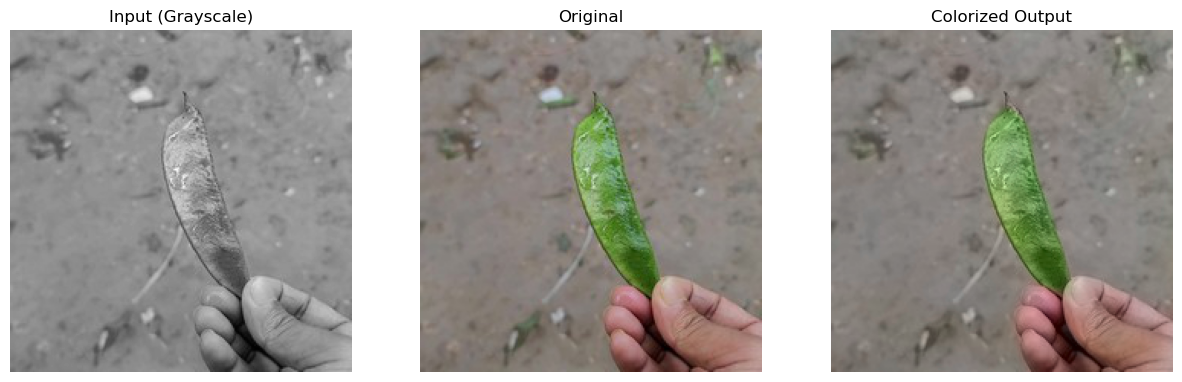

Colorized image saved to: colorized_output.jpg
Comparison image saved to: colorized_output_comparison.jpg


In [ ]:
import torch
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import io
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def load_model(model_path, device):
    model = UNetColorization().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    return model

def colorize_image(model, image_path, output_path, device='cpu'):
    # Load and preprocess image
    img = Image.open(image_path).convert('RGB')
    original_size = img.size
    img_resized = img.resize((256, 256))

    # Create grayscale input
    gray_input = rgb2gray(np.array(img))
    input_image = Image.fromarray((gray_input * 255).astype(np.uint8))

    # Convert to Lab color space
    img_lab = rgb2lab(np.array(img_resized)).astype("float32")
    L = img_lab[:, :, 0] / 50.0 - 1.0
    L_tensor = torch.from_numpy(L).unsqueeze(0).unsqueeze(0).float().to(device)

    # Model inference
    with torch.no_grad():
        ab_pred = model(L_tensor)
        ab_pred = ab_pred.cpu().squeeze(0).numpy().transpose(1, 2, 0)

    # Process predicted ab channels
    ab_pred = ab_pred * 128.0
    ab_pred_uint8 = (ab_pred + 128).astype(np.uint8)
    ab_pred_resized = np.array(Image.fromarray(ab_pred_uint8).resize(original_size, Image.BILINEAR))
    ab_pred_resized = ab_pred_resized.astype(np.float32) - 128

    # Combine channels and convert to RGB
    img_lab_original = rgb2lab(np.array(img)).astype("float32")
    L_original = img_lab_original[:, :, 0]
    lab_pred = np.concatenate((L_original[:, :, np.newaxis], ab_pred_resized), axis=2)
    rgb_pred = lab2rgb(lab_pred)

    # Create output image
    output_image = Image.fromarray((np.clip(rgb_pred, 0, 1) * 255).astype(np.uint8))

    # Save individual output
    output_image.save(output_path)

    # Create comparison figure
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(input_image, cmap='gray')
    plt.title('Input (Grayscale)')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(output_image)
    plt.title('Colorized Output')
    plt.axis('off')

    # Save comparison first
    comparison_path = output_path.replace('.jpg', '_comparison.jpg')
    plt.savefig(comparison_path, bbox_inches='tight', pad_inches=0, dpi=300)

    # Then display
    plt.show()

    # Close figure to free memory
    plt.close()

    return output_path, comparison_path

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_path = "./output/unet_colorization_veg_valid.pth"
    model = load_model(model_path, device)

    image_path = './consolidated_vegs/test/Bean_0003.jpg'
    output_path = 'colorized_output.jpg'
    colorized_path, comparison_path = colorize_image(model, image_path, output_path, device)
    print(f"Colorized image saved to: {colorized_path}")
    print(f"Comparison image saved to: {comparison_path}")

### 6.3 Mallin rajoitukset

Malli on treenattu datasetilla joka sisältää pelkästään vihanneksia. Tämän takia malli on oppinut piirteitä ja värejä jotka luonnollisesti esiintyvät vihanneksissa.
Kokeillaan seuraavaksi värittää muunlaisia kuvia.

Väritetään ensiksi sininen auto. Sinistä väriä ilmenee luonnossa harvoin vihanneksissa ja datasetissa muutenkin. Autossa taas ilmenee samankaltaisia kiiltäviä pintoja kun esim tomaatissa tai paprikassa.

![bluecar UNet](https://drive.google.com/uc?id=1ILZEgwsDpPWT4CIgDrJFZUE5FTZvs4Pt)

Niin kuin näkyykin malli värjää kiiltävät pinnat vihreiksi ja punaiseksi.
Kokeillaan seuraavaksi värittää vanhanajan mustavalkoista kuvaa.

![Ali](https://drive.google.com/uc?id=1RHU-8zMQ2H7__66gGyMN7I0akH5ZpCdE)

Malli ei hirveän hyvin värjää tätä kuvaa.
Lopputuloksena: Malli ei yleisty hyvin kaikkiin kuviin.

## 7. Yhteenveto

Tässä projektissa kehitettiin ja koulutettiin neuroverkkomalli mustavalkoisten valokuvien värittämiseen realistisesti. Prosessi noudatti CRISP-DM-prosessimallia, ja keskeisiä painopisteitä olivat datan valmistelu, mallin rakentaminen ja tulosten arviointi. Projektin aikana kokeiltiin useita neuroverkkorakenteita ja datasettejä parhaiden tulosten saavuttamiseksi.

Alkuvaiheessa maisema-datasetillä saadut tulokset olivat vaihtelevia. Käytetyt mallit, kuten CNN ja esikoulutettu VGG16, tuottivat osittain toimivia värejä, mutta kärsivät ongelmista kuten virheellisistä sävyistä ja heikosta yleistettävyydestä eri luokkien välillä. Lopulta siirryttiin U-Net-arkkitehtuuriin, joka paransi tuloksia merkittävästi. Silti maisema-datasetin monimutkaisuus esti täysin tyydyttävien tulosten saavuttamisen.

Datasetin vaihtaminen yksinkertaisempiin ja johdonmukaisempiin vihannesten kuviin ratkaisi monia haasteita. Lopullisella datasetillä ja U-Net-mallilla saavutettiin korkealaatuisia ja uskottavia värittämistuloksia. Kuitenkin, mallia arvioitaessa todettiin, että pelkkien vihannesten käyttö mallin koulutukseen rajoitti mallin käytettävyyttä muihin valokuviin. Toisin sanoen, malli toimii hyvin vihannesten värittämiseen, mutta ei ole uskottavasti yleistettävissä muunlaisiin valokuviin.

Projektin lähestymistapa osoitti, että datan valinnalla ja oikean mallin käyttämisellä on merkittävä vaikutus väritystulosten laatuun. Vaikka täydellisiä tuloksia ei kaikissa tapauksissa saavutettu, lopputulos osoitti menetelmän potentiaalin käytännön sovelluksiin.